### Import libraries

In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.3/152.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 5.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import sdv
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

### Adjusting range of df viewing
- Show all rows and columns
- Show only 10 rows and columns



In [ ]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

### Importing data

In [ ]:
df = pd.read_excel('../../data/processed/v2_cleaned_imbalanced_survey_data.xlsx')

In [ ]:
df.head()

,Survey_ID,Age,Gender,Tourist/Local,USS companion [Children],...,Purchasing factors [Fast Checkout Process],Purchasing factors [Personalised Recommendations based on Visitor Preferences],Purchasing factors [Live Chat/Support for Booking Assistance],Purchasing factors [Option to Add-On Parking Passes during Purchase],Suggestions for improving USS website
0,1,2,2,2,0,...,4,4,3,4,nil
1,2,2,2,2,0,...,5,5,5,5,nil
2,3,2,2,2,0,...,4,4,4,4,nil
3,4,2,2,2,0,...,4,3,4,3,nil
4,5,2,1,2,0,...,5,3,3,5,nil


### Remove repeated questions

In [ ]:
# Remove reundant columns (repeated)
df = df.drop(columns=['Attractions busy day [Battlestar Galactica: Human vs. Cylon]',
                      'Attractions busy day [Transformers The Ride: The Ultimate 3D Battle]',
                      'Attractions busy day [Revenge of the Mummy]',
                      'Attractions busy day [Jurassic Park Rapids Adventure]',
                      'Attractions busy day [Sesame Street Spaghetti Space Chase]',
                      'Attractions busy day [Canopy Flyer]',
                      "Attractions busy day [Puss In Boots' Giant Journey]",
                      "Attractions busy day [Dino-Soarin']",
                      'Attractions busy day [Enchanted Airways]',
                      'Attractions busy day [Treasure Hunters (Vintage Car Attraction)]',
                      'Attractions busy day [Accelerator (Spinning Ride)]',
                      'Attractions busy day [Magic Potion Spin (Far Far Away Ferris Wheel)]',
                      'Attractions busy day [Lights, Camera, Action!]',
                      'Attractions busy day [The Dance for the Magic Beans (Interactive show with Puss in Boots and Kitty Softpaws)]',
                      'Attractions busy day [Shrek 4-D Adventure]',
                      'Attractions busy day [Donkey Live]',
                      'Attractions busy day [Rhythm Truck 2.0]',
                      'Attractions busy day [WaterWorld]',
                      'Attractions waiting [Battlestar Galactica: Human vs. Cylon]',
                      'Attractions waiting [Transformers The Ride: The Ultimate 3D Battle]',
                      'Attractions waiting [Revenge of the Mummy]',
                      'Attractions waiting [Jurassic Park Rapids Adventure]',
                      'Attractions waiting [Sesame Street Spaghetti Space Chase]',
                      'Attractions waiting [Canopy Flyer]',
                      "Attractions waiting [Puss In Boots' Giant Journey]",
                      "Attractions waiting [Dino-Soarin']",
                      'Attractions waiting [Enchanted Airways]',
                      'Attractions waiting [Treasure Hunters (Vintage Car Attraction)]',
                      'Attractions waiting [Accelerator (Spinning Ride)]',
                      'Attractions waiting [Magic Potion Spin (Far Far Away Ferris Wheel)]',
                      'Attractions waiting [Lights, Camera, Action!]',
                      'Attractions waiting [The Dance for the Magic Beans (Interactive show with Puss in Boots and Kitty Softpaws)]',
                      'Attractions waiting [Shrek 4-D Adventure]',
                      'Attractions waiting [Donkey Live]',
                      'Attractions waiting [Rhythm Truck 2.0]',
                      'Attractions waiting [WaterWorld]',
                      'Worsen experience [Long wait time]',
                      'Worsen experience [Crowds]',
                      'Worsen experience [Attractions not being fun enough]',
                      'Worsen experience [Expensive food options]',
                      'Worsen experience [Inaccessibility (Lack of ramps, Uneven ground, lack of seats etc)]',
                      'Worsen experience [Hot weather]',
                      'Worsen experience [Lack of Shaded Rest Areas]',
                      'Worsen experience [Usability of the Universal Studios Singapore App]'])

In [ ]:
df.head()

,Survey_ID,Age,Gender,Tourist/Local,USS companion [Children],...,Purchasing factors [Fast Checkout Process],Purchasing factors [Personalised Recommendations based on Visitor Preferences],Purchasing factors [Live Chat/Support for Booking Assistance],Purchasing factors [Option to Add-On Parking Passes during Purchase],Suggestions for improving USS website
0,1,2,2,2,0,...,4,4,3,4,nil
1,2,2,2,2,0,...,5,5,5,5,nil
2,3,2,2,2,0,...,4,4,4,4,nil
3,4,2,2,2,0,...,4,3,4,3,nil
4,5,2,1,2,0,...,5,3,3,5,nil


### Synthesising data
1. EDA
2. SVD
3. SMOTE


**Remove open-ended questions**

We first make copy of the cleaned data frame (df) to perform the data synthesis, before removing the columns with open-ended questions (i.e. 'Suggestions for improving USS experience' and 'Suggestions for improving USS website') as these are the only two columns that have non-integer entries. We also remove the unique index identifier (Survey_ID) as it affects the data synthesis.
- These columns and datapoints will be added back once the synthetic data is produced.

In [ ]:
# remove unique identifier (Survey_ID) and open-ended questions (col1, col2) -> add back after smote/oversampling methods are completed
df2 = df.copy()

# splicing segments of dataframe; col1 = uss experience, col2 = uss website
uss_exp_inx, uss_web_idx = df.columns.get_loc('Suggestions for improving USS experience'), df.columns.get_loc('Suggestions for improving USS website') # (151, 171)
df2_bef_col1 = df.iloc[:, 1:uss_exp_inx] # skip Survey_ID column this time
df2_btw_col1_col2 = df.iloc[:, uss_exp_inx + 1: uss_web_idx]
df2_aft_col2 = df.iloc[:, uss_web_idx + 1 :]

df2 = pd.concat([df2_bef_col1, df2_btw_col1_col2, df2_aft_col2], axis = 1)
df2.head()

,Age,Gender,Tourist/Local,USS companion [Children],USS companion [Family],...,Purchasing factors [Clear Refund and Exchange Policies],Purchasing factors [Fast Checkout Process],Purchasing factors [Personalised Recommendations based on Visitor Preferences],Purchasing factors [Live Chat/Support for Booking Assistance],Purchasing factors [Option to Add-On Parking Passes during Purchase]
0,2,2,2,0,1,...,4,4,4,3,4
1,2,2,2,0,1,...,5,5,5,5,5
2,2,2,2,0,0,...,4,4,4,4,4
3,2,2,2,0,1,...,4,4,3,4,3
4,2,1,2,0,0,...,3,5,3,3,5


#### 1. EDA
- age - majority: 20 - 29 years old: 67.20%
- gender - majority: Female: 73.02%
- tourist/local - majority: Local: 93.12%

In [ ]:
n = len(df)

##### Age

19 years old and younger: 9.52%
20 - 29 years old: 67.20%
30 - 39 years old: 6.88%
40 - 49 years old: 7.41%
50 years old and above: 8.99%


<function matplotlib.pyplot.show(close=None, block=None)>

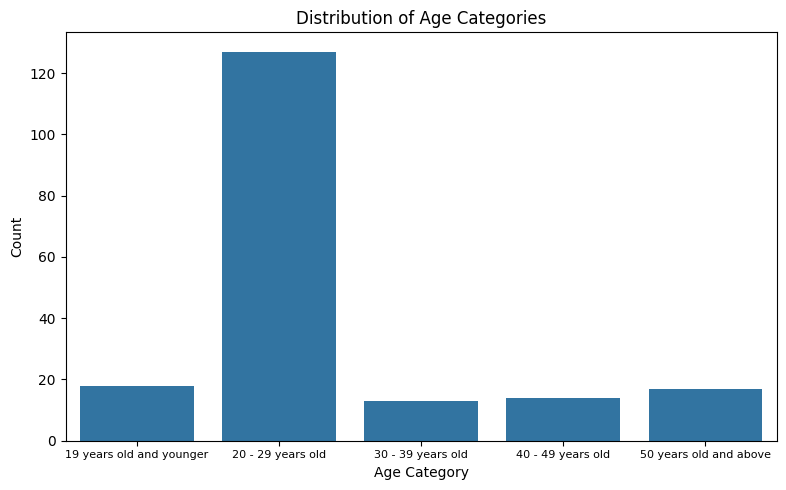

In [ ]:
# age
age_eda = df.copy()
age_pk = pd.read_csv('../../data/processed/Age_mapped.csv')

# count number of instances of each category
age_counts = age_eda['Age'].value_counts().reset_index().sort_values(by='Age')
age_counts.columns = ['a', 'Count']
age_counts_merged = pd.merge(age_pk, age_counts, left_on='Age_ID', right_on='a', how='inner').drop(columns=['a']) # drop duplicate column
age_counts_merged

# get exact percentages
for index, row in age_counts_merged.iterrows():
    age = row['Age']
    count = row['Count']
    percentage = (count / n) * 100
    print(f"{age}: {percentage:.2f}%")

# 19 years old and younger: 9.52%
# 20 - 29 years old: 67.20%
# 30 - 39 years old: 6.88%
# 40 - 49 years old: 7.41%
# 50 years old and above: 8.99%

# visualise
plt.figure(figsize=(8, 5))
sns.barplot(data=age_counts_merged, x='Age', y='Count')
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show

##### Gender

Male: 26.98%
Female: 73.02%


<function matplotlib.pyplot.show(close=None, block=None)>

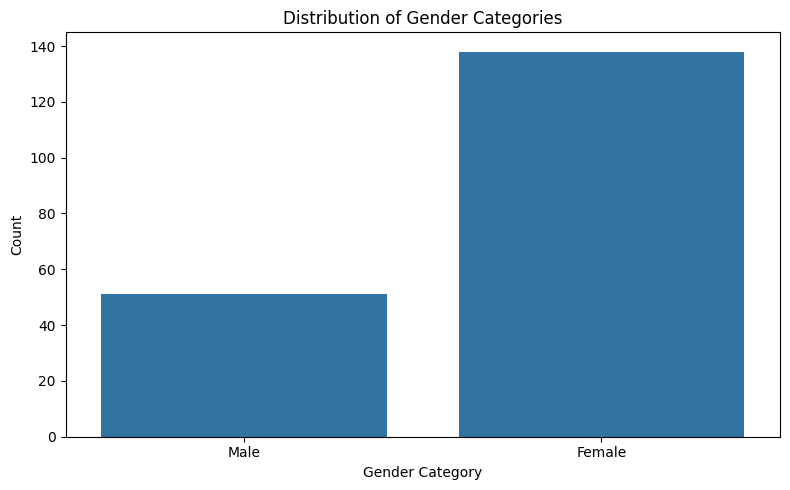

In [ ]:
# gender
gender_eda = df.copy()
gender_pk = pd.read_csv('../../data/processed/Gender_mapped.csv')

# count number of instances of each category
gender_counts = age_eda['Gender'].value_counts().reset_index().sort_values(by='Gender')
gender_counts.columns = ['g', 'Count']
gender_counts_merged = pd.merge(gender_pk, gender_counts, left_on='Gender_ID', right_on='g', how='inner').drop(columns=['g']) # drop duplicate column
gender_counts_merged

# get exact percentages
for index, row in gender_counts_merged.iterrows():
    gender = row['Gender']
    count = row['Count']
    percentage = (count / n) * 100
    print(f"{gender}: {percentage:.2f}%")

# Male: 26.98%
# Female: 73.02%

# visualise
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_counts_merged, x='Gender', y='Count')
plt.title('Distribution of Gender Categories')
plt.xlabel('Gender Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show

##### Tourist/Local

Tourist: 6.88%
Local: 93.12%


<function matplotlib.pyplot.show(close=None, block=None)>

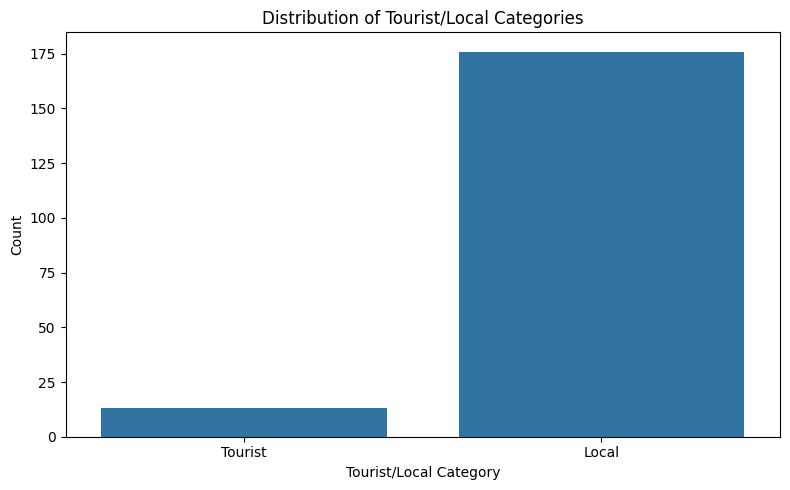

In [ ]:
# tourist/local
tl_eda = df.copy()
tl_pk = pd.read_csv('../../data/processed/Tourist_Local_mapped.csv')

# count number of instances of each category
tl_counts = age_eda['Tourist/Local'].value_counts().reset_index().sort_values(by='Tourist/Local')
tl_counts.columns = ['tl', 'Count']
tl_counts_merged = pd.merge(tl_pk, tl_counts, left_on='Tourist/Local_ID', right_on='tl', how='inner').drop(columns=['tl']) # drop duplicate column
tl_counts_merged

# get exact percentages
for index, row in tl_counts_merged.iterrows():
    gender = row['Tourist/Local']
    count = row['Count']
    percentage = (count / n) * 100
    print(f"{gender}: {percentage:.2f}%")

# Tourist: 6.88%
# Local: 93.12%

# visualise
plt.figure(figsize=(8, 5))
sns.barplot(data=tl_counts_merged, x='Tourist/Local', y='Count')
plt.title('Distribution of Tourist/Local Categories')
plt.xlabel('Tourist/Local Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show

#### Split data into train and test

We first need to split the data into train and test data to prevent data leakage during the subsequent data synthesis.

Split into 75 train, 15 validation, 15 test

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame without a target column
train_data, temp_data = train_test_split(df2, test_size=0.30, random_state=42)  # 0.30 * 0.70 = 0.15
# Now, split temp_data into validation and test sets
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)  # 0.5 * 0.30 = 0.15

In [ ]:
print(len(train_data)) # 132
print(len(val_data)) # 28
print(len(test_data)) # 29

132
28
29


In [ ]:
x_train = train_data[['Age', 'Gender', 'Tourist/Local']]
x_test = test_data[['Age', 'Gender', 'Tourist/Local']]
x_val = val_data[['Age', 'Gender', 'Tourist/Local']]

y_train = train_data.iloc[:, 3:]
y_test = test_data.iloc[:, 3:]
y_val = val_data.iloc[:, 3:]

In [ ]:
print(len(x_train)) # 132
print(len(x_val)) # 28
print(len(x_test)) # 29
print('---')
print(len(y_train)) # 132
print(len(y_val)) # 28
print(len(y_test)) # 29

132
28
29
---
132
28
29


##### Check distribution of train

- 19 years old and younger: 9.85% |
20 - 29 years old: 65.91% |
30 - 39 years old: 7.58% |
40 - 49 years old: 9.09% |
50 years old and above: 7.58%

- Male: 25.76% |
Female: 74.24%

- Tourist: 6.82% |
Local: 93.18%

In [ ]:
n_train = len(x_train)
n_train

132

##### Age

In [ ]:
# age
age_eda_train = train_data.copy()

# count number of instances of each category
age_counts_train = age_eda_train['Age'].value_counts().reset_index().sort_values(by='Age')
age_counts_train.columns = ['a', 'Count']
age_counts_merged_train = pd.merge(age_pk, age_counts_train, left_on='Age_ID', right_on='a', how='inner').drop(columns=['a']) # drop duplicate column
age_counts_merged_train

# get exact percentages

for index, row in age_counts_merged_train.iterrows():
    age = row['Age']
    count = row['Count']
    percentage = (count / n_train) * 100
    print(f"{age}: {percentage:.2f}%")

# 19 years old and younger: 9.85%
# 20 - 29 years old: 65.91%
# 30 - 39 years old: 7.58%
# 40 - 49 years old: 9.09%
# 50 years old and above: 7.58%

19 years old and younger: 9.85%
20 - 29 years old: 65.91%
30 - 39 years old: 7.58%
40 - 49 years old: 9.09%
50 years old and above: 7.58%


##### Gender

In [ ]:
# gender
gender_eda_train = x_train.copy()

# count number of instances of each category
gender_counts_train = gender_eda_train['Gender'].value_counts().reset_index().sort_values(by='Gender')
gender_counts_train.columns = ['g', 'Count']
gender_counts_merged_train = pd.merge(gender_pk, gender_counts_train, left_on='Gender_ID', right_on='g', how='inner').drop(columns=['g']) # drop duplicate column
gender_counts_merged_train

# get exact percentages
for index, row in gender_counts_merged_train.iterrows():
    gender = row['Gender']
    count = row['Count']
    percentage = (count / n_train) * 100
    print(f"{gender}: {percentage:.2f}%")

# Male: 25.76%
# Female: 74.24%

Male: 25.76%
Female: 74.24%


##### Tourist/Local

In [ ]:
# tourist/local
tl_eda_train = x_train.copy()

# count number of instances of each category
tl_counts_train = tl_eda_train['Tourist/Local'].value_counts().reset_index().sort_values(by='Tourist/Local')
tl_counts_train.columns = ['tl', 'Count']
tl_counts_merged_train = pd.merge(tl_pk, tl_counts_train, left_on='Tourist/Local_ID', right_on='tl', how='inner').drop(columns=['tl']) # drop duplicate column
tl_counts_merged_train

# get exact percentages
for index, row in tl_counts_merged_train.iterrows():
    tl = row['Tourist/Local']
    count = row['Count']
    percentage = (count / n_train) * 100
    print(f"{tl}: {percentage:.2f}%")

# Tourist: 6.82%
# Local: 93.18%

Tourist: 6.82%
Local: 93.18%


#### 2. SVD

We first perform SVD to increase the number of data points we have to prepare the data for SMOTE by increasing the number of minority data we have whilst maintaining the distribution. Since SVD replicates the behaviour of the original data, the synthesised data should have similar behaviour and distributions to the original dataframe.

##### SVD algorithm

In [ ]:
!pip install sdv

In [ ]:
# 1. Create a metadata object and detect the properties of your dataframe
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=train_data)  # Use your training data

# 2. Inspect metadata to ensure correct column types and properties
print("Detected Metadata:")
print(metadata.to_dict())  # This will show the types of your columns

# 3. Initialize the GaussianCopulaSynthesizer with the metadata
synthesizer = GaussianCopulaSynthesizer(metadata=metadata)

# 4. Fit the synthesizer to your training dataframe
synthesizer.fit(train_data)  # Fit to train_data

# 5. Sample synthetic data (adjust num_rows as needed)
num_rows = len(train_data)  # Use the number of rows in train_data
synthetic_train_data = synthesizer.sample(num_rows=num_rows)

# 6. Show synthetic data
print("Synthetic Data Sample:")
synthetic_train_data

Detected Metadata:
{'columns': {'Age': {'sdtype': 'categorical'}, 'Gender': {'sdtype': 'categorical'}, 'Tourist/Local': {'sdtype': 'categorical'}, 'USS companion [Children]': {'sdtype': 'categorical'}, 'USS companion [Family]': {'sdtype': 'categorical'}, 'USS companion [Friends]': {'sdtype': 'categorical'}, 'USS companion [Significant other]': {'sdtype': 'categorical'}, 'Visiting frequency': {'sdtype': 'categorical'}, 'Visiting occasion [Free tickets]': {'sdtype': 'categorical'}, 'Visiting occasion [Public holiday]': {'sdtype': 'categorical'}, 'Visiting occasion [School holiday]': {'sdtype': 'categorical'}, 'Visiting occasion [School/work event]': {'sdtype': 'categorical'}, 'Visiting occasion [Special events]': {'sdtype': 'categorical'}, 'Visiting occasion [Special occasion]': {'sdtype': 'categorical'}, 'Visiting occasion [Weekdays]': {'sdtype': 'categorical'}, 'Visiting occasion [Weekends]': {'sdtype': 'categorical'}, 'Attractive factors [Food options]': {'sdtype': 'categorical'}, 'At

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Synthetic Data Sample:


,Age,Gender,Tourist/Local,USS companion [Children],USS companion [Family],...,Purchasing factors [Clear Refund and Exchange Policies],Purchasing factors [Fast Checkout Process],Purchasing factors [Personalised Recommendations based on Visitor Preferences],Purchasing factors [Live Chat/Support for Booking Assistance],Purchasing factors [Option to Add-On Parking Passes during Purchase]
0,2,2,2,0,1,...,2,5,3,4,3
1,2,2,2,0,1,...,4,4,3,3,3
2,2,2,2,0,1,...,5,4,2,3,3
3,4,2,2,0,1,...,4,5,4,3,3
4,2,2,2,0,0,...,5,5,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...
127,2,2,2,0,1,...,3,5,3,2,3
128,2,1,2,0,0,...,3,5,2,3,2
129,2,2,2,0,1,...,5,4,5,3,4
130,4,2,2,1,1,...,3,3,3,3,3


##### Evaluate distribution of the synthesised data

In [ ]:
def compare_summary_statistics(real_data, synthetic_data):
    """
    Compare summary statistics (mean, median, standard deviation) between real and synthetic data.

    Parameters:
    - real_data: Real dataset (pandas DataFrame)
    - synthetic_data: Synthetic dataset (pandas DataFrame)
    """
    stats_real = real_data.describe().T[['mean', '50%', 'std']]
    stats_synthetic = synthetic_data.describe().T[['mean', '50%', 'std']]

    comparison = pd.concat([stats_real, stats_synthetic], axis=1, keys=['Real', 'Synthetic'])
    print(comparison)

# Example usage
compare_summary_statistics(train_data, synthetic_train_data)

                                                        Real                 \
                                                        mean  50%       std   
Age                                                 2.386364  2.0  1.038552   
Gender                                              1.742424  2.0  0.438965   
Tourist/Local                                       1.931818  2.0  0.253018   
USS companion [Children]                            0.106061  0.0  0.309088   
USS companion [Family]                              0.522727  1.0  0.501386   
...                                                      ...  ...       ...   
Purchasing factors [Clear Refund and Exchange P...  4.068182  4.0  0.966565   
Purchasing factors [Fast Checkout Process]          4.166667  4.0  0.989770   
Purchasing factors [Personalised Recommendation...  3.378788  3.0  1.066709   
Purchasing factors [Live Chat/Support for Booki...  3.439394  4.0  1.113810   
Purchasing factors [Option to Add-On Parking Pa...  

In [ ]:
def compare_summary_statistics(real_data, synthetic_data, threshold):
    """
    Compare summary statistics (mean, median, standard deviation) between real and synthetic data.
    Calculate percentage differences and flag significant discrepancies.

    Parameters:
    - real_data: Real dataset (pandas DataFrame)
    - synthetic_data: Synthetic dataset (pandas DataFrame)
    - threshold (float): The percentage difference threshold to flag large deviations (default is 5%).

    Returns:
    - comparison (pd.DataFrame): DataFrame containing the statistics and percentage differences.
    - significant_diff (pd.DataFrame): DataFrame containing columns with significant deviations.
    """
    # Calculate summary statistics for real and synthetic data
    stats_real = real_data.describe().T[['mean', '50%', 'std']].rename(columns={'50%': 'median'})
    stats_synthetic = synthetic_data.describe().T[['mean', '50%', 'std']].rename(columns={'50%': 'median'})

    # Combine both into one DataFrame for easy comparison
    comparison = pd.concat([stats_real, stats_synthetic], axis=1, keys=['Real', 'Synthetic'])

    # Calculate percentage differences for mean, median, and standard deviation
    for stat in ['mean', 'median', 'std']:
        comparison[('Difference', stat)] = (comparison[('Synthetic', stat)] - comparison[('Real', stat)]) / comparison[('Real', stat)] * 100

    # Flag significant differences based on the threshold
    significant_diff = comparison[comparison[('Difference', 'mean')].abs() > threshold]

    # Output the results
    # print(f"Summary statistics comparison (threshold: {threshold}%):")
    # print(comparison)

    if not significant_diff.empty:
        print(f"\nColumns with significant differences (more than {threshold}%):")
        print(significant_diff)
    else:
        print("\nNo significant differences found.")

    return comparison, significant_diff

# Example usage:
comparison, significant_diff = compare_summary_statistics(train_data, synthetic_train_data, 10.0)
significant_diff


Columns with significant differences (more than 10.0%):
                                              Real                  Synthetic  \
                                              mean median       std      mean   
USS companion [Children]                  0.106061    0.0  0.309088  0.128788   
Visiting occasion [Free tickets]          0.015152    0.0  0.122621  0.007576   
Visiting occasion [School/work event]     0.083333    0.0  0.277438  0.068182   
Visiting occasion [Special occasion]      0.386364    0.0  0.488770  0.310606   
Visiting occasion [Weekends]              0.280303    0.0  0.450858  0.234848   
...                                            ...    ...       ...       ...   
Max tolerable ticket price [Non-peak]     2.803030    3.0  1.421962  3.113636   
Return factors [Souvenirs]                2.545455    3.0  1.268308  2.212121   
Ticket purchase avenues [Other Websites]  0.106061    0.0  0.309088  0.189394   
Ticket purchase avenues [Resalers]        0.113636  

Real                  Synthetic  \
                                              mean median       std      mean   
USS companion [Children]                  0.106061    0.0  0.309088  0.128788   
Visiting occasion [Free tickets]          0.015152    0.0  0.122621  0.007576   
Visiting occasion [School/work event]     0.083333    0.0  0.277438  0.068182   
Visiting occasion [Special occasion]      0.386364    0.0  0.488770  0.310606   
Visiting occasion [Weekends]              0.280303    0.0  0.450858  0.234848   
...                                            ...    ...       ...       ...   
Max tolerable ticket price [Non-peak]     2.803030    3.0  1.421962  3.113636   
Return factors [Souvenirs]                2.545455    3.0  1.268308  2.212121   
Ticket purchase avenues [Other Websites]  0.106061    0.0  0.309088  0.189394   
Ticket purchase avenues [Resalers]        0.113636    0.0  0.318578  0.098485   
Ticket purchase avenues [USS Website]     0.719697    1.0  0.450858  0.803030   

                                                          Difference  \
                                         median       std       mean   
USS companion [Children]                    0.0  0.336241  21.428571   
Visiting occasion [Free tickets]            0.0  0.087039 -50.000000   
Visiting occasion [School/work event]       0.0  0.253018 -18.181818   
Visiting occasion [Special occasion]        0.0  0.464505 -19.607843   
Visiting occasion [Weekends]                0.0  0.425519 -16.216216   
...                                         ...       ...        ...   
Max tolerable ticket price [Non-peak]       3.0  1.541526  11.081081   
Return factors [Souvenirs]                  2.0  1.210831 -13.095238   
Ticket purchase avenues [Other Websites]    0.0  0.393314  78.571429   
Ticket purchase avenues [Resalers]          0.0  0.299104 -13.333333   
Ticket purchase avenues [USS Website]       1.0  0.399224  11.578947   

                                                                
                                             median        std  
USS companion [Children]                        NaN   8.784836  
Visiting occasion [Free tickets]                NaN -29.017879  
Visiting occasion [School/work event]           NaN  -8.802112  
Visiting occasion [Special occasion]            NaN  -4.964683  
Visiting occasion [Weekends]                    NaN  -5.620240  
...                                             ...        ...  
Max tolerable ticket price [Non-peak]      0.000000   8.408366  
Return factors [Souvenirs]               -33.333333  -4.531791  
Ticket purchase avenues [Other Websites]        NaN  27.249731  
Ticket purchase avenues [Resalers]              NaN  -6.112755  
Ticket purchase avenues [USS Website]      0.000000 -11.452370  

[11 rows x 9 columns]

##### Add synthesised data to the original data

In [ ]:
merged_train_df = pd.concat([train_data, synthetic_train_data], ignore_index=True)
merged_train_df # len = 264

,Age,Gender,Tourist/Local,USS companion [Children],USS companion [Family],...,Purchasing factors [Clear Refund and Exchange Policies],Purchasing factors [Fast Checkout Process],Purchasing factors [Personalised Recommendations based on Visitor Preferences],Purchasing factors [Live Chat/Support for Booking Assistance],Purchasing factors [Option to Add-On Parking Passes during Purchase]
0,2,1,2,0,1,...,5,4,2,4,3
1,2,2,2,0,1,...,4,5,4,4,2
2,2,2,2,0,1,...,3,5,3,3,3
3,2,2,2,0,0,...,5,5,2,3,4
4,2,1,2,0,1,...,4,5,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...
259,2,2,2,0,1,...,3,5,3,2,3
260,2,1,2,0,0,...,3,5,2,3,2
261,2,2,2,0,1,...,5,4,5,3,4
262,4,2,2,1,1,...,3,3,3,3,3


#### 3. SMOTE

We address the imbalanced data by first using oversampling to synthesise data. We will also use the number of data that falls under certain demographics of people to guide our subsequent data synthesis using domain knowledge.

In [ ]:
def balance_distributions_with_smote(df, target_columns):
    balanced_df = df.copy()  # Start with a copy of the original DataFrame
    for col in target_columns:
        print(f"Original distribution for column: {col}")
        print(balanced_df[col].value_counts(normalize=True) * 100)
        print("\n" + "-" * 40 + "\n")

        # Prepare data for resampling
        X = balanced_df.drop(columns=[col])
        y = balanced_df[col]

        # Initialize SMOTE
        smote = SMOTE(random_state=42)

        # Apply SMOTE
        X_resampled, y_resampled = smote.fit_resample(X, y)

        # Create a new DataFrame for the resampled data
        resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

        # Concatenate the target column with the resampled features
        resampled_df[col] = y_resampled

        # Concatenate original and resampled DataFrames
        balanced_df = pd.concat([balanced_df, resampled_df], ignore_index=True)

        # Reset index after concatenation to ensure it's clean
        balanced_df.reset_index(drop=True, inplace=True)

        # Print new distribution
        print(f"New distribution for column: {col}")
        print(balanced_df[col].value_counts(normalize=True) * 100)
        print("\n" + "-" * 40 + "\n")

    return balanced_df

# Specify the categorical columns you want to balance
target_columns = ['Age', 'Gender', 'Tourist/Local']

# Call the function to balance distributions using SMOTE
balanced_train_df = balance_distributions_with_smote(merged_train_df, target_columns)
balanced_train_df

Original distribution for column: Age
Age
2    65.151515
1    10.227273
4     9.848485
5     7.575758
3     7.196970
Name: proportion, dtype: float64

----------------------------------------

New distribution for column: Age
Age
2    30.604982
1    17.704626
4    17.615658
5    17.081851
3    16.992883
Name: proportion, dtype: float64

----------------------------------------

Original distribution for column: Gender
Gender
2    66.725979
1    33.274021
Name: proportion, dtype: float64

----------------------------------------



<ipython-input-28-2b7e0e18f7bb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_df[col] = y_resampled
<ipython-input-28-2b7e0e18f7bb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_df[col] = y_resampled


New distribution for column: Gender
Gender
2    57.164634
1    42.835366
Name: proportion, dtype: float64

----------------------------------------

Original distribution for column: Tourist/Local
Tourist/Local
2    87.919207
1    12.080793
Name: proportion, dtype: float64

----------------------------------------

New distribution for column: Tourist/Local
Tourist/Local
2    63.746891
1    36.253109
Name: proportion, dtype: float64

----------------------------------------



<ipython-input-28-2b7e0e18f7bb>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_df[col] = y_resampled


,Age,Gender,Tourist/Local,USS companion [Children],USS companion [Family],...,Purchasing factors [Clear Refund and Exchange Policies],Purchasing factors [Fast Checkout Process],Purchasing factors [Personalised Recommendations based on Visitor Preferences],Purchasing factors [Live Chat/Support for Booking Assistance],Purchasing factors [Option to Add-On Parking Passes during Purchase]
0,2,1,2,0,1,...,5,4,2,4,3
1,2,2,2,0,1,...,4,5,4,4,2
2,2,2,2,0,1,...,3,5,3,3,3
3,2,2,2,0,0,...,5,5,2,3,4
4,2,1,2,0,1,...,4,5,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...
7233,1,1,1,0,1,...,5,4,4,5,3
7234,1,1,1,0,0,...,4,4,3,4,3
7235,2,1,1,0,1,...,3,5,3,3,3
7236,1,2,1,0,0,...,3,3,3,3,3


In [ ]:
def print_category_distributions(df):
    # Iterate over each column in the DataFrame
    for col in df.columns:
        if pd.api.types.is_integer_dtype(df[col]):  # Include integer-based categorical columns
            print(f"Distribution for column: {col}")
            print(df[col].value_counts(normalize=True) * 100)  # Normalize for percentage
            print("\n" + "-"*40 + "\n")

# Example usage with your DataFrame
print_category_distributions(balanced_train_df)

Distribution for column: Age
Age
2    25.241779
1    25.062172
3    20.489085
4    17.656811
5    11.550152
Name: proportion, dtype: float64

----------------------------------------

Distribution for column: Gender
Gender
1    51.271069
2    48.728931
Name: proportion, dtype: float64

----------------------------------------

Distribution for column: Tourist/Local
Tourist/Local
2    63.746891
1    36.253109
Name: proportion, dtype: float64

----------------------------------------

Distribution for column: USS companion [Children]
USS companion [Children]
0    91.751865
1     8.248135
Name: proportion, dtype: float64

----------------------------------------

Distribution for column: USS companion [Family]
USS companion [Family]
0    67.615363
1    32.384637
Name: proportion, dtype: float64

----------------------------------------

Distribution for column: USS companion [Friends]
USS companion [Friends]
0    62.254767
1    37.745233
Name: proportion, dtype: float64

-----------------

#### 4. Add back Survey_ID column and open-ended questions

In [ ]:
# store open-ended questions
df_open_ended = df[[ 'Suggestions for improving USS experience', 'Suggestions for improving USS website']]
df_open_ended

,Suggestions for improving USS experience,Suggestions for improving USS website
0,let people know beforehand if a ride is not op...,nil
1,nil,nil
2,nil,nil
3,shorter waiting times pls,nil
4,nil,nil
...,...,...
184,nil,nil
185,nil,nil
186,sorry i just dl uss,nil
187,nil,nil


In [ ]:
# add Survey_ID back
df3 = balanced_train_df.copy()
df3['Survey_ID'] = range(1, len(df3) + 1)
df3.insert(0, 'Survey_ID', df3.pop('Survey_ID'))

df3

,Survey_ID,Age,Gender,Tourist/Local,USS companion [Children],...,Purchasing factors [Clear Refund and Exchange Policies],Purchasing factors [Fast Checkout Process],Purchasing factors [Personalised Recommendations based on Visitor Preferences],Purchasing factors [Live Chat/Support for Booking Assistance],Purchasing factors [Option to Add-On Parking Passes during Purchase]
0,1,2,1,2,0,...,5,4,2,4,3
1,2,2,2,2,0,...,4,5,4,4,2
2,3,2,2,2,0,...,3,5,3,3,3
3,4,2,2,2,0,...,5,5,2,3,4
4,5,2,1,2,0,...,4,5,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...
7233,7234,1,1,1,0,...,5,4,4,5,3
7234,7235,1,1,1,0,...,4,4,3,4,3
7235,7236,2,1,1,0,...,3,5,3,3,3
7236,7237,1,2,1,0,...,3,3,3,3,3


In [ ]:
x_train

,Age,Gender,Tourist/Local
154,2,1,2
155,2,2,2
181,2,2,2
85,2,2,2
90,2,1,2
...,...,...,...
106,2,2,2
14,2,2,2
92,4,1,2
179,1,2,2


### Export final cleaned excel file (csv, xlsx)

In [ ]:
## TRAIN cleaned balanced survey data ##

# export as csv
csv_file_name = "[V2] TRAIN_Survey_data.csv"
csv_folder_path = '/content/drive/MyDrive/DSA3101 Data/Processed Data/Survey [Train, Val, Test]/'

df3.to_csv(csv_folder_path + csv_file_name, index=False)  # exclude index
print(f"Exported df3 to {csv_folder_path + csv_file_name}")

# export as xlsx
excel_file_name = "[V2] TRAIN_Survey_data.xlsx"
excel_folder_path = '/content/drive/MyDrive/DSA3101 Data/Processed Data/Survey [Train, Val, Test]/'

df3.to_excel(excel_folder_path + excel_file_name, index=False)  # exclude index
print(f"Exported df3 to {excel_folder_path + excel_file_name}")


Exported df3 to /content/drive/MyDrive/DSA3101 Data/Processed Data/Survey [Train, Val, Test]/[V2] TRAIN_Survey_data.csv
Exported df3 to /content/drive/MyDrive/DSA3101 Data/Processed Data/Survey [Train, Val, Test]/[V2] TRAIN_Survey_data.xlsx


In [ ]:
## VALIDATION cleaned balanced survey data ##

# export as csv
csv_file_name = "[V2] VAL_Survey_data.csv"
csv_folder_path = '/content/drive/MyDrive/DSA3101 Data/Processed Data/Survey [Train, Val, Test]/'

val_data.to_csv(csv_folder_path + csv_file_name, index=False)  # exclude index
print(f"Exported val_data to {csv_folder_path + csv_file_name}")

# export as xlsx
excel_file_name = "[V2] VAL_Survey_data.xlsx"
excel_folder_path = '/content/drive/MyDrive/DSA3101 Data/Processed Data/Survey [Train, Val, Test]/'

val_data.to_excel(excel_folder_path + excel_file_name, index=False)  # exclude index
print(f"Exported val_data to {excel_folder_path + excel_file_name}")


Exported val_data to /content/drive/MyDrive/DSA3101 Data/Processed Data/Survey [Train, Val, Test]/[V2] VAL_Survey_data.csv
Exported val_data to /content/drive/MyDrive/DSA3101 Data/Processed Data/Survey [Train, Val, Test]/[V2] VAL_Survey_data.xlsx


In [ ]:
## TEST cleaned balanced survey data ##

# export as csv
csv_file_name = "[V2] TEST_Survey_data.csv"
csv_folder_path = '/content/drive/MyDrive/DSA3101 Data/Processed Data/Survey [Train, Val, Test]/'

test_data.to_csv(csv_folder_path + csv_file_name, index=False)  # exclude index
print(f"Exported test_data to {csv_folder_path + csv_file_name}")

# export as xlsx
excel_file_name = "[V2] TEST_Survey_data.xlsx"
excel_folder_path = '/content/drive/MyDrive/DSA3101 Data/Processed Data/Survey [Train, Val, Test]/'

test_data.to_excel(excel_folder_path + excel_file_name, index=False)  # exclude index
print(f"Exported test_data to {excel_folder_path + excel_file_name}")


Exported test_data to /content/drive/MyDrive/DSA3101 Data/Processed Data/Survey [Train, Val, Test]/[V2] TEST_Survey_data.csv
Exported test_data to /content/drive/MyDrive/DSA3101 Data/Processed Data/Survey [Train, Val, Test]/[V2] TEST_Survey_data.xlsx


In [ ]:
## open ended questions ##

# export as csv
csv_file_name = "Survey_open_ended_questions.csv"
csv_folder_path = '/content/drive/MyDrive/DSA3101 Data/Clean Data/'

df_open_ended.to_csv(csv_folder_path + csv_file_name, index=False)  # exclude index
print(f"Exported df_open_ended to {csv_folder_path + csv_file_name}")

# export as xlsx
excel_file_name = "Survey_open_ended_questions.xlsx"
excel_folder_path = '/content/drive/MyDrive/DSA3101 Data/Clean Data/'

df_open_ended.to_excel(excel_folder_path + excel_file_name, index=False)  # exclude index
print(f"Exported df_open_ended to {excel_folder_path + excel_file_name}")

Exported df_open_ended to /content/drive/MyDrive/DSA3101 Data/Clean Data/Survey_open_ended_questions.csv
Exported df_open_ended to /content/drive/MyDrive/DSA3101 Data/Clean Data/Survey_open_ended_questions.xlsx
